In [4]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [3]:
# define state

class BMIState(TypedDict):
    weight: float
    height: float
    bmi: float

In [6]:
def calculate_bmi(state: BMIState) -> BMIState:
    state["bmi"] = state["weight"] / (state["height"] ** 2)
    return state

In [7]:
#define the graph
graph=StateGraph(BMIState)

#add nodes to graph
graph.add_node("calculate_bmi",calculate_bmi)
#add edges to graph
graph.add_edge(START,"calculate_bmi")
graph.add_edge("calculate_bmi",END)
# compile the graph
workflow=graph.compile()

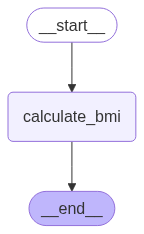

In [8]:
workflow

In [9]:
# execute the graph

initial_state={"weight": 70, "height": 1.75}

final_state=workflow.invoke(initial_state)
print(final_state)

{'weight': 70, 'height': 1.75, 'bmi': 22.857142857142858}


# Improving workflow by adding new node

In [10]:
#lets change the workflow and add another node
def bmi_type(state:BMIState) -> BMIState:
    if state["bmi"] < 18.5:
        state["bmi_type"] = "Underweight"
    elif 18.5 <= state["bmi"] < 24.9:
        state["bmi_type"] = "Normal weight"
    elif 25 <= state["bmi"] < 29.9:
        state["bmi_type"] = "Overweight"
    else:
        state["bmi_type"] = "Obesity"
    return state


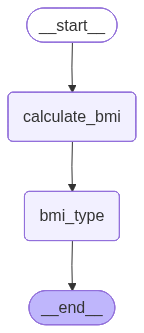

In [12]:
graph=StateGraph(BMIState)

graph.add_node("calculate_bmi",calculate_bmi)
graph.add_node("bmi_type",bmi_type)


graph.add_edge(START,"calculate_bmi")
graph.add_edge("calculate_bmi","bmi_type")
graph.add_edge("bmi_type",END)

workflow=graph.compile()
workflow